In [2]:
import pylab as pl
import pandas as pd
import numpy as np
from numpy import ma
import os
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data1 = pd.read_excel('Vulcan_Population_2002.xlsx')
data1.columns

Index([u'State', u'County', u'FIPS', u'Total', u'popestimate2002',
       u'Land Area'],
      dtype='object')

In [4]:
data2 = pd.read_excel('CBSA_2003.xlsx')
data2.columns

Index([              u'CBSA Code',              u'CBSA Title',
                 u'Level of CBSA', u'Status, 1=metro 2=micro',
                u'Component Name',                   u'State',
                          u'FIPS'],
      dtype='object')

In [5]:
completedata = pd.merge(data1, data2, on='FIPS')
completedata.columns

Index([                u'State_x',                  u'County',
                          u'FIPS',                   u'Total',
               u'popestimate2002',               u'Land Area',
                     u'CBSA Code',              u'CBSA Title',
                 u'Level of CBSA', u'Status, 1=metro 2=micro',
                u'Component Name',                 u'State_y'],
      dtype='object')

In [6]:
databyCBSA = completedata.groupby(['CBSA Title']).sum()
databyCBSA.columns

Index([                   u'FIPS',                   u'Total',
               u'popestimate2002',               u'Land Area',
                     u'CBSA Code', u'Status, 1=metro 2=micro'],
      dtype='object')

In [7]:
a = ['CBSA Code', 'Status, 1=metro 2=micro', 'FIPS']
databyCBSA.drop(a, inplace = True , axis = 1 )

In [8]:
databyCBSA.columns = ['TCO2', 'Tpop2002', 'Larea']

In [9]:
databyCBSAcut = databyCBSA[databyCBSA['Tpop2002'] > 100000]

In [10]:
databyCBSAcut['CO2pcap'] = databyCBSAcut['TCO2']/databyCBSAcut['Tpop2002']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
databyCBSAcut['Pden'] = databyCBSAcut['Tpop2002']/databyCBSAcut['Larea']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
databyCBSAcut.shape

(376, 5)

In [13]:
databyCBSAcut.sort(['Tpop2002'], ascending=False).head(10)

,TCO2,Tpop2002,Larea,CO2pcap,Pden
CBSA Title,,,,,
"New York-Northern New Jersey-Long Island, NY-NJ-PA",42.901219,18603110,6725.87,0.000002,2765.903891
"Los Angeles-Long Beach-Santa Ana, CA",26.645275,12745084,4850.27,0.000002,2627.706086
"Chicago-Naperville-Joliet, IL-IN-WI",47.924484,9286207,7212.02,0.000005,1287.601393
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",17.528782,5751803,4629.64,0.000003,1242.386665
"Dallas-Fort Worth-Arlington, TX",16.390027,5484061,8989.64,0.000003,610.042338
"Miami-Fort Lauderdale-Miami Beach, FL",12.734297,5232107,5125.57,0.000002,1020.785396
"Washington-Arlington-Alexandria, DC-VA-MD-WV",17.416755,5026217,5627.12,0.000003,893.213047
"Houston-Baytown-Sugar Land, TX",33.237825,4986399,8928.23,0.000007,558.498045
"Atlanta-Sandy Springs-Marietta, GA",24.628193,4529256,8376.49,0.000005,540.710489


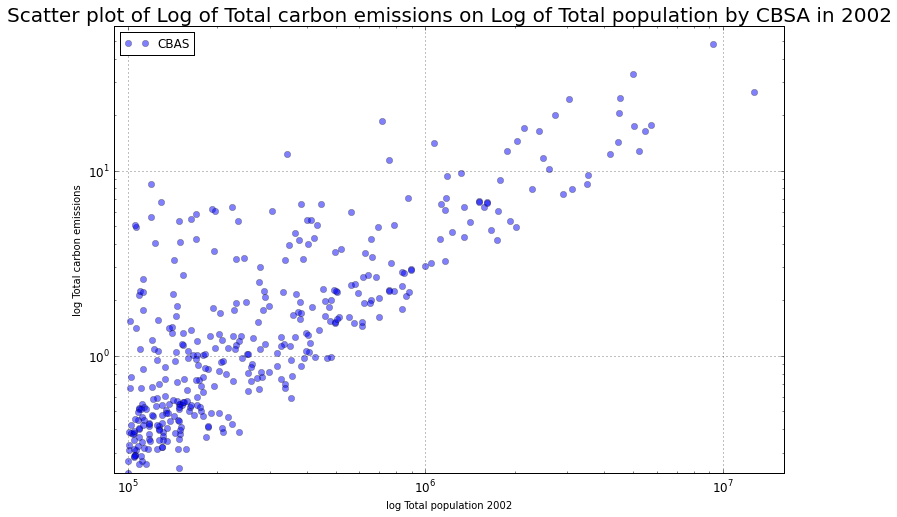

In [14]:
ax = databyCBSAcut.plot(x ='Tpop2002', y ='TCO2', xlim=(90000, 16000000), ylim=(0, 60), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5, logx=True, logy=True, label='CBAS')
ax.set_xlabel("log Total population 2002")
ax.set_ylabel("log Total carbon emissions")
ax.set_title("Scatter plot of Log of Total carbon emissions on Log of Total population by CBSA in 2002", fontsize = 20)

In [15]:
scipy.stats.pearsonr(databyCBSAcut['Tpop2002'], databyCBSAcut['TCO2'])

(0.84660661220550071, 1.757635408236061e-104)

In [16]:
databyCBSAcut['Tpop2002log'] = np.log10(databyCBSA.Tpop2002)
databyCBSAcut['TCO2log'] = np.log10(databyCBSA.TCO2)

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [17]:
mod1 = smf.ols(formula="TCO2log ~ Tpop2002log", data=databyCBSAcut).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                TCO2log   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     697.7
Date:                Wed, 18 Nov 2015   Prob (F-statistic):           1.64e-87
Time:                        10:33:45   Log-Likelihood:                -72.911
No. Observations:                 376   AIC:                             149.8
Df Residuals:                     374   BIC:                             157.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -4.8041      0.188    -25.524      

In [18]:
b = (mod1.params)
x_prime1 = np.linspace(databyCBSAcut.Tpop2002log.min(), databyCBSAcut.Tpop2002log.max(), 100)
y_hat1 = b[0] + b[1]*(x_prime1)

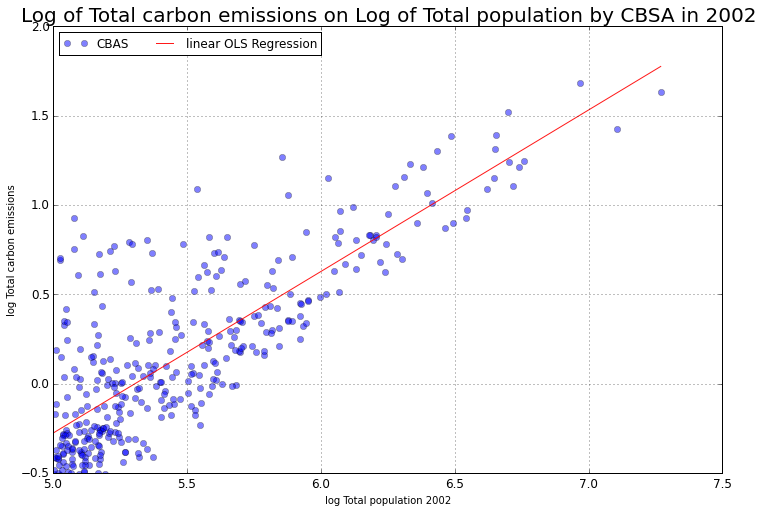

In [19]:
ax = databyCBSAcut.plot(x ='Tpop2002log', y ='TCO2log', xlim=(5, 7.5), ylim=(-0.5, 2), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5, label='CBAS')
ax.set_xlabel("log Total population 2002")
ax.set_ylabel("log Total carbon emissions")
ax.set_title("Log of Total carbon emissions on Log of Total population by CBSA in 2002", fontsize = 20)
pl.plot(x_prime1, y_hat1, 'r', alpha=0.9, label="linear OLS Regression")
pl.legend(ncol = 2, loc=2)

In [20]:
databyCBSAcut.sort(['TCO2'], ascending=False).head(10)

,TCO2,Tpop2002,Larea,CO2pcap,Pden,Tpop2002log,TCO2log
CBSA Title,,,,,,,
"Chicago-Naperville-Joliet, IL-IN-WI",47.924484,9286207,7212.02,0.000005,1287.601393,6.967838,1.680557
"New York-Northern New Jersey-Long Island, NY-NJ-PA",42.901219,18603110,6725.87,0.000002,2765.903891,7.269586,1.632470
"Houston-Baytown-Sugar Land, TX",33.237825,4986399,8928.23,0.000007,558.498045,6.697787,1.521633
"Los Angeles-Long Beach-Santa Ana, CA",26.645275,12745084,4850.27,0.000002,2627.706086,7.105343,1.425620
"Atlanta-Sandy Springs-Marietta, GA",24.628193,4529256,8376.49,0.000005,540.710489,6.656027,1.391433
"Minneapolis-St. Paul-Bloomington, MN-WI",24.211738,3054637,6063.07,0.000008,503.810281,6.484960,1.384026
"Detroit-Warren-Livonia, MI",20.548159,4484140,3914.07,0.000005,1145.646348,6.651679,1.312773
"St. Louis, MO-IL",19.984705,2729045,8649.25,0.000007,315.523889,6.436011,1.300698
"Baton Rouge, LA",18.546887,716817,4029.92,0.000026,177.873754,5.855408,1.268271


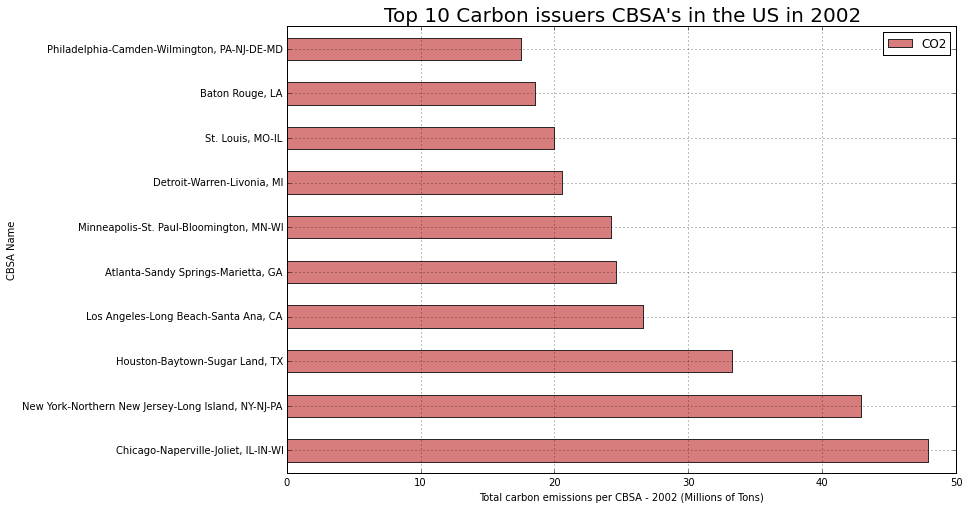

In [21]:
ax1= databyCBSAcut.sort(['TCO2'], ascending=False).head(10).plot( y='TCO2', kind='Barh', \
                figsize=(12,8), grid = True, alpha = 0.8, color = 'IndianRed', label="CO2")
ax1.set_xlabel("Total carbon emissions per CBSA - 2002 (Millions of Tons)")
ax1.set_ylabel("CBSA Name")
ax1.set_title("Top 10 Carbon issuers CBSA's in the US in 2002", fontsize = 20)
#ax1.axis('off')
ax1.tick_params(labelsize = 10)

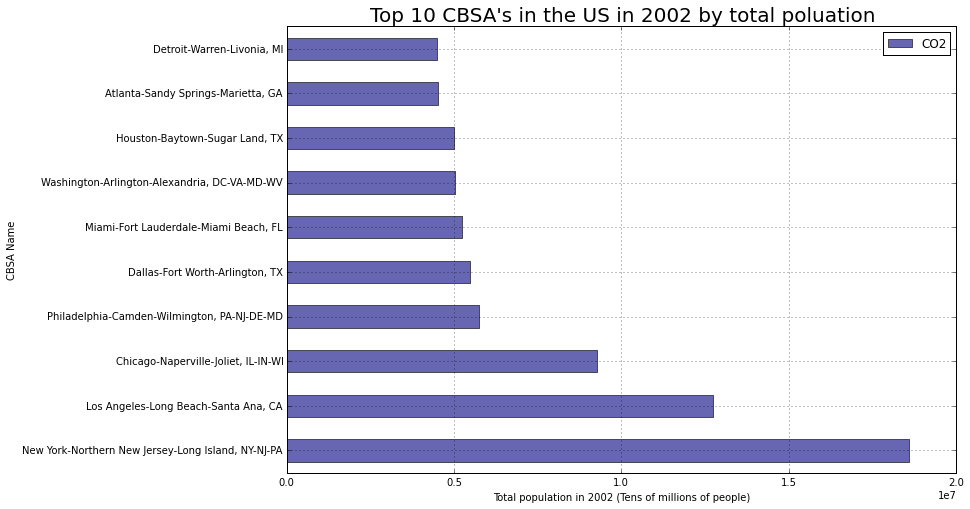

In [22]:
ax1= databyCBSAcut.sort(['Tpop2002'], ascending=False).head(10).plot( y='Tpop2002', kind='Barh', \
                figsize=(12,8), grid = True, alpha = 0.6, color = 'Navy', label="CO2")
ax1.set_xlabel("Total population in 2002 (Tens of millions of people)")
ax1.set_ylabel("CBSA Name")
ax1.set_title("Top 10 CBSA's in the US in 2002 by total poluation", fontsize = 20)
#ax1.axis('off')
ax1.tick_params(labelsize = 10)

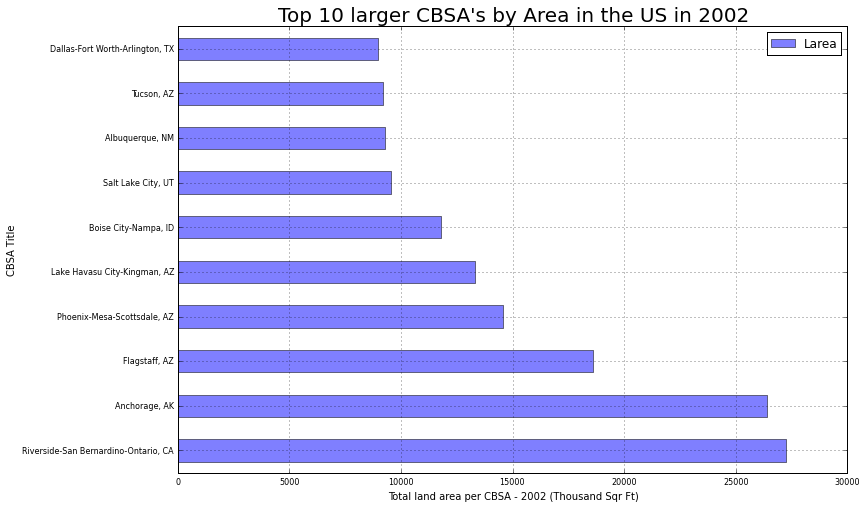

In [23]:
ax2= databyCBSAcut.sort(['Larea'], ascending=False).head(10).plot( y='Larea', kind='Barh', \
                figsize=(12,8), grid = True, alpha = 0.5, color = 'Blue')
ax2.set_xlabel("Total land area per CBSA - 2002 (Thousand Sqr Ft)")
ax2.set_title("Top 10 larger CBSA's by Area in the US in 2002", fontsize = 20)
ax2.tick_params(labelsize = 8)

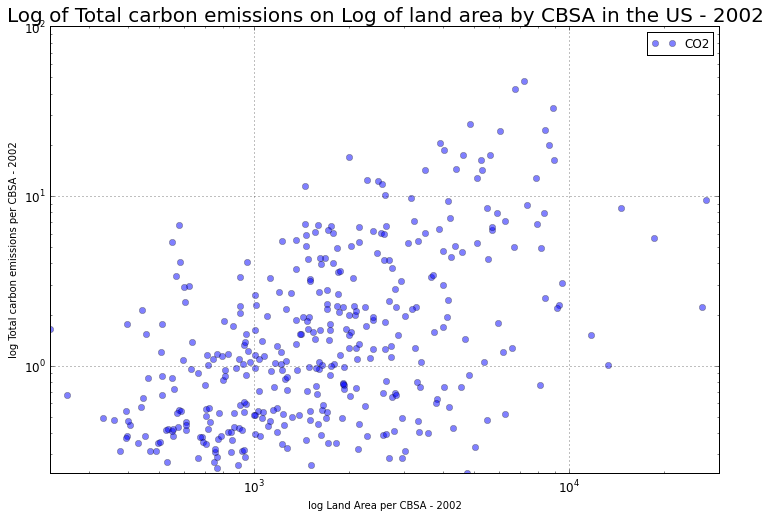

In [24]:
ax3 = databyCBSAcut.plot(x ='Larea', y ='TCO2', xlim=(-100, 30000), ylim=(-100, 100), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5, logx=True, logy=True, label='CO2')
ax3.set_xlabel("log Land Area per CBSA - 2002")
ax3.set_ylabel("log Total carbon emissions per CBSA - 2002")
ax3.set_title("Log of Total carbon emissions on Log of land area by CBSA in the US - 2002", fontsize = 20)

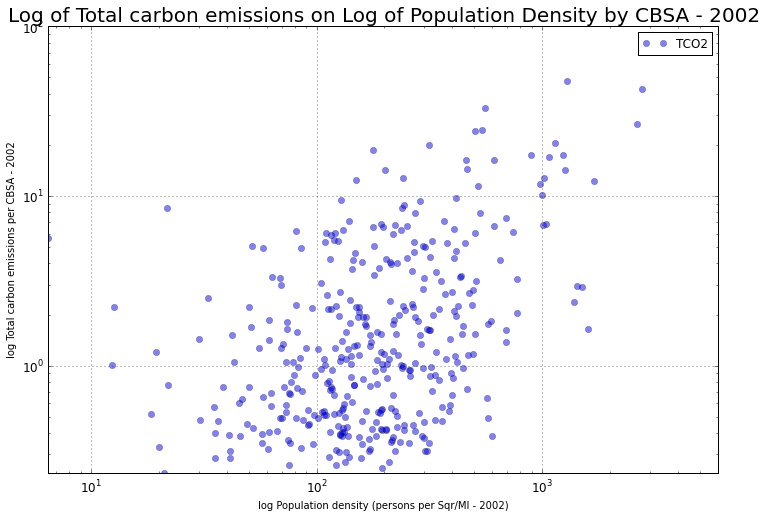

In [25]:
ax4 = databyCBSAcut.plot(x ='Pden', y ='TCO2', xlim=(-100, 6000), ylim=(-100,100), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5, logx=True, logy=True)
ax4.set_xlabel("log Population density (persons per Sqr/Ml - 2002)")
ax4.set_ylabel("log Total carbon emissions per CBSA - 2002")
ax4.set_title("Log of Total carbon emissions on Log of Population Density by CBSA - 2002", fontsize = 20)

In [26]:
scipy.stats.pearsonr(databyCBSAcut['Larea'], databyCBSAcut['TCO2'])

(0.37724449000080834, 3.6672452193241838e-14)

In [27]:
scipy.stats.pearsonr(databyCBSAcut['Pden'], databyCBSAcut['TCO2'])

(0.60159231355234277, 2.2202375026194581e-38)

In [28]:
databyCBSAcut.sort(['CO2pcap'], ascending=False).head(10)

,TCO2,Tpop2002,Larea,CO2pcap,Pden,Tpop2002log,TCO2log
CBSA Title,,,,,,,
"Farmington, NM",8.453822,120367,5514.02,0.000070,21.829264,5.080507,0.927053
"Weirton-Steubenville, WV-OH",6.722961,129663,581.28,0.000052,223.064616,5.112816,0.827561
"Pine Bluff, AR",5.068528,106162,2043.76,0.000048,51.944455,5.025969,0.704882
"Flagstaff, AZ",5.632171,120295,18617.42,0.000047,6.461422,5.080248,0.750676
"Manhattan, KS",4.928487,106379,1838.48,0.000046,57.862473,5.026856,0.692714
"Evansville, IN-KY",12.352887,344022,2290.79,0.000036,150.176140,5.536586,1.091768
"Monroe, MI",5.346132,149253,551.10,0.000036,270.827436,5.173923,0.728040
"Terre Haute, IN",5.858006,169759,1465.00,0.000035,115.876451,5.229833,0.767750
"Parkersburg-Marietta, WV-OH",5.491250,163381,1366.16,0.000034,119.591409,5.213202,0.739671


In [30]:
databyCBSAcut.sort(['CO2pcap'], ascending=True).head(10)

,TCO2,Tpop2002,Larea,CO2pcap,Pden,Tpop2002log,TCO2log
CBSA Title,,,,,,,
"Bremerton-Silverdale, WA",0.385786,236174,395.97,0.000002,596.444175,5.373232,-0.413653
"Brownsville-Harlingen, TX",0.589178,353561,905.76,0.000002,390.347333,5.548464,-0.229753
"Jacksonville, NC",0.248845,149003,766.82,0.000002,194.312877,5.173195,-0.604071
"Chico, CA",0.387643,209203,1639.49,0.000002,127.602486,5.320568,-0.411568
"Yakima, WA",0.427474,224823,4296.23,0.000002,52.330299,5.351841,-0.369090
"Laredo, TX",0.407319,207611,3356.83,0.000002,61.847338,5.317250,-0.390065
"Killeen-Temple-Fort Hood, TX",0.667743,338009,2823.52,0.000002,119.711920,5.528928,-0.175390
"Johnson City, TN",0.364894,183505,853.50,0.000002,215.002929,5.263648,-0.437834
"Greenville, NC",0.312058,156656,916.98,0.000002,170.839059,5.194947,-0.505765


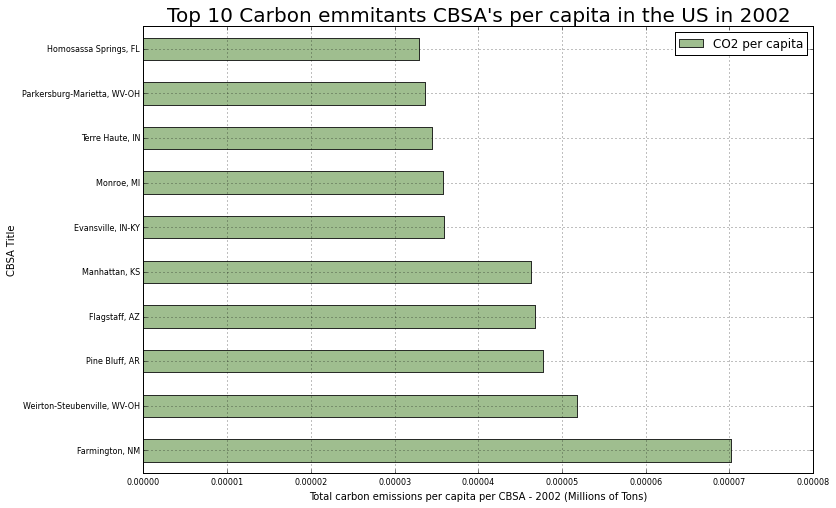

In [31]:
ax5= databyCBSAcut.sort(['CO2pcap'], ascending=False).head(10).plot( y='CO2pcap', kind='Barh', \
                figsize=(12,8), grid = True, alpha = 0.8, color = 'Sage', label ="CO2 per capita")
ax5.set_xlabel("Total carbon emissions per capita per CBSA - 2002 (Millions of Tons)")
ax5.set_title("Top 10 Carbon emmitants CBSA's per capita in the US in 2002", fontsize = 20)
ax5.tick_params(labelsize = 8)

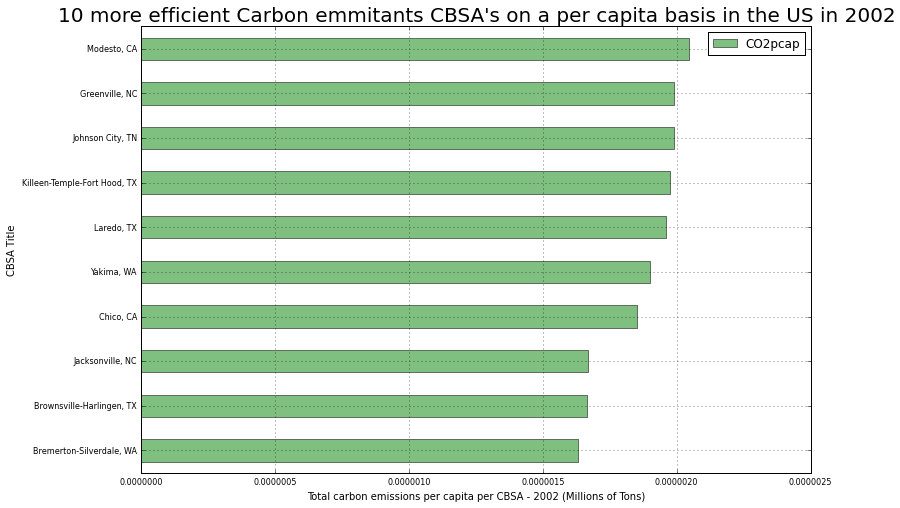

In [33]:
ax6= databyCBSAcut.sort(['CO2pcap'], ascending=True).head(10).plot( y='CO2pcap', kind='Barh', \
                figsize=(12,8), grid = True, alpha = 0.5, color = 'Green')
ax6.set_xlabel("Total carbon emissions per capita per CBSA - 2002 (Millions of Tons)")
ax6.set_title("10 more efficient Carbon emmitants CBSA's on a per capita basis in the US in 2002", fontsize = 20)
ax6.tick_params(labelsize = 8)

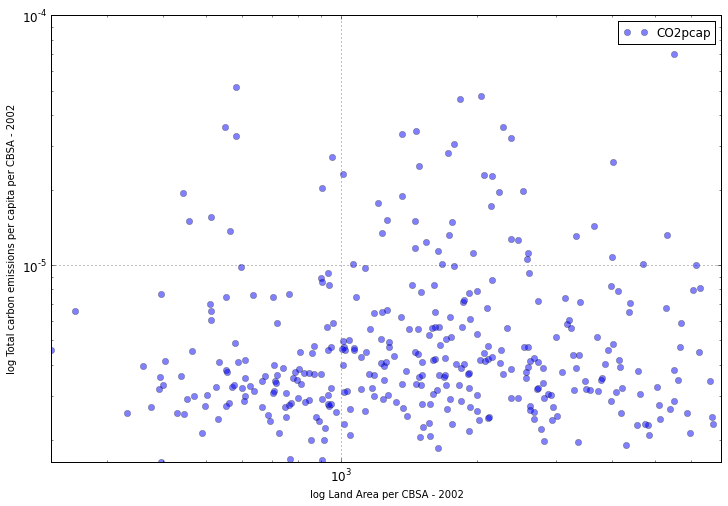

In [34]:
ax6 = databyCBSAcut.plot(x ='Larea', y ='CO2pcap', xlim=(-100, 7000), ylim=(-100,0.0001), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5, logx=True, logy=True)
ax6.set_xlabel("log Land Area per CBSA - 2002")
ax6.set_ylabel("log Total carbon emissions per capita per CBSA - 2002")

In [35]:
scipy.stats.pearsonr(databyCBSAcut['Larea'], databyCBSAcut['CO2pcap'])

(0.048276642747818857, 0.35053792740666012)

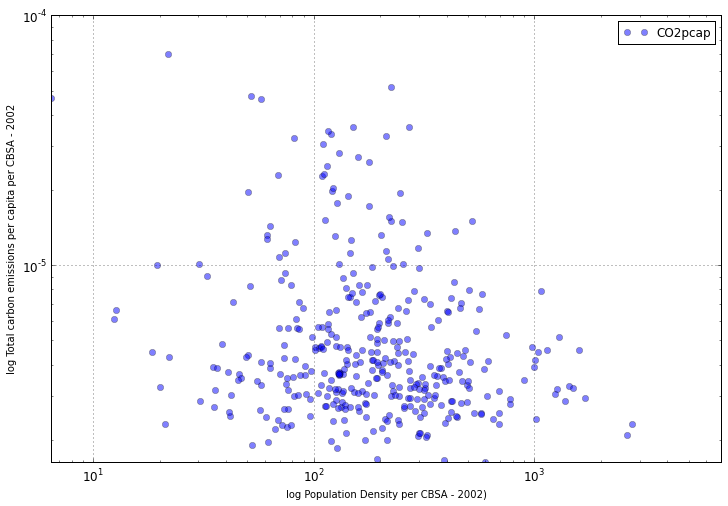

In [36]:
ax6 = databyCBSAcut.plot(x ='Pden', y ='CO2pcap', xlim=(-1000, 7000), ylim=(-100,0.0001), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5, logx=True, logy=True)
ax6.set_xlabel("log Population Density per CBSA - 2002)")
ax6.set_ylabel("log Total carbon emissions per capita per CBSA - 2002")

In [37]:
scipy.stats.pearsonr(databyCBSAcut['Pden'], databyCBSAcut['CO2pcap'])

(-0.15203037504776384, 0.0031230415319148741)

In [38]:
databyCBSAcut['Pdenlog'] = np.log10(databyCBSAcut.Pden)
databyCBSAcut['CO2pcaplog'] = np.log10(databyCBSAcut.CO2pcap)

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [39]:
mod = smf.ols(formula="CO2pcaplog ~ Pdenlog", data=databyCBSAcut).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2pcaplog   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     17.18
Date:                Wed, 18 Nov 2015   Prob (F-statistic):           4.22e-05
Time:                        10:37:37   Log-Likelihood:                -68.283
No. Observations:                 376   AIC:                             140.6
Df Residuals:                     374   BIC:                             148.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9627      0.088    -56.173      0.0

In [40]:
a = (mod.params)
x_prime = np.linspace(databyCBSAcut.Pdenlog.min(), databyCBSAcut.Pdenlog.max(), 100)
y_hat = a[0] + a[1]*(x_prime)

In [41]:
databyCBSAcut.CO2pcaplog.min()

-5.786885127919363

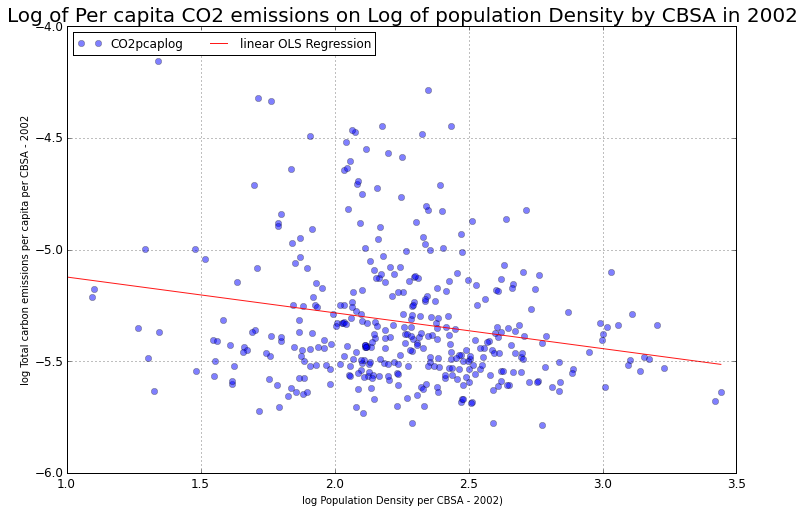

In [42]:
ax7 = databyCBSAcut.plot(x ='Pdenlog', y ='CO2pcaplog', xlim=(1, 3.5), ylim=(-6,-4), style='o', grid=True, \
                figsize=(12,8), fontsize = 12, alpha=0.5)
ax7.set_xlabel("log Population Density per CBSA - 2002)")
ax7.set_ylabel("log Total carbon emissions per capita per CBSA - 2002")
ax7.set_title("Log of Per capita CO2 emissions on Log of population Density by CBSA in 2002", fontsize = 20)
pl.plot(x_prime, y_hat, 'r', alpha=0.9, label="linear OLS Regression")
pl.legend(ncol = 2, loc=2)